C:\Users\letic\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  3 of 3 completed


Ticker         AAPL        GOOGL         MSFT
count   1718.000000  1718.000000  1718.000000
mean       0.001199     0.000875     0.001151
std        0.019412     0.019354     0.018266
min       -0.128647    -0.116342    -0.147390
25%       -0.008124    -0.008334    -0.007659
50%        0.001244     0.001389     0.001281
75%        0.011539     0.010789     0.010746
max        0.119808     0.102244     0.142169


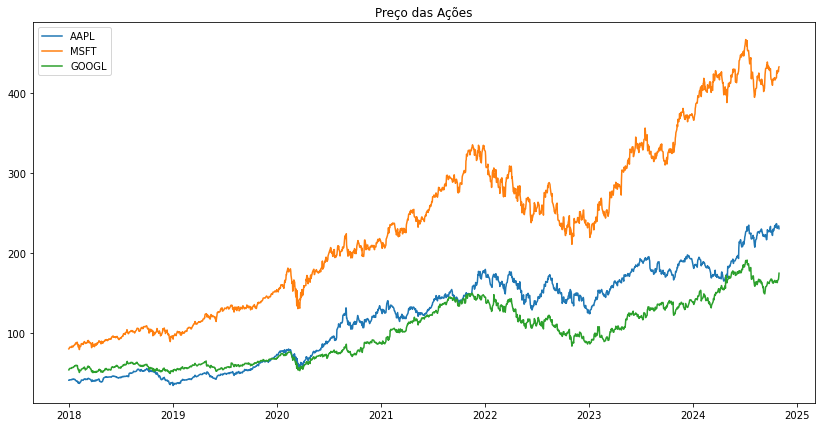

Risco anualizado (Desvio Padrão):
 Ticker
AAPL     0.308162
GOOGL    0.307238
MSFT     0.289959
dtype: float64
Retorno anualizado:
 Ticker
AAPL     0.302165
GOOGL    0.220599
MSFT     0.290078
dtype: float64


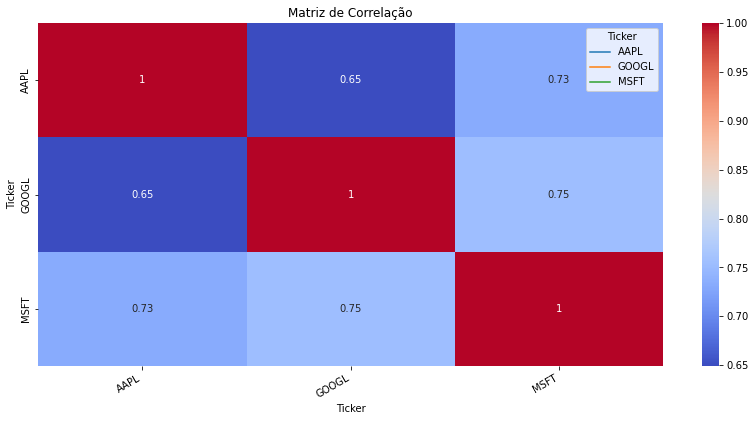

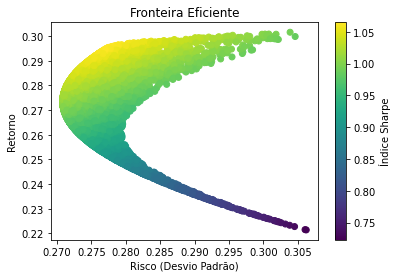

Alocação com maior Índice Sharpe:
 {'Retorno': 0.29541704456556306, 'Risco': 0.27747818286171266, 'Índice Sharpe': 1.064649629454978, 'Pesos': array([0.61174577, 0.16039874, 0.22785549])}


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Coleta de Dados

tickers = ['AAPL', 'MSFT', 'GOOGL']  # Ações escolhidas
start_date = '2018-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Coletando dados
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data = data.dropna()


# Análise Exploratória dos Dados
# Retornos diários

daily_returns = data.pct_change().dropna()
print(daily_returns.describe())


# Visualização dos Preços e Retornos
# Gráficos de preço e retorno acumulado.

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title('Preço das Ações')
plt.legend()
plt.show()

# Retorno acumulado
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(14, 7), title='Retorno Acumulado')


# Análise de Risco e Retorno
# Risco (Desvio Padrão dos Retornos)

annual_risk = daily_returns.std() * np.sqrt(252)
print("Risco anualizado (Desvio Padrão):\n", annual_risk)

# Retorno Esperado

annual_return = daily_returns.mean() * 252
print("Retorno anualizado:\n", annual_return)


# Correlação entre Ações

sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


# Simulação de Carteiras e Análise de Eficiência

n_portfolios = 10000
results = np.zeros((3, n_portfolios))

for i in range(n_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return = np.sum(weights * annual_return)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_risk
    results[2, i] = results[0, i] / results[1, i]  # Índice Sharpe

# Plotagem da Fronteira Eficiente
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Índice Sharpe')
plt.xlabel('Risco (Desvio Padrão)')
plt.ylabel('Retorno')
plt.title('Fronteira Eficiente')
plt.show()


# Portfólio Ótimo (Máximo Índice de Sharpe)

max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = {
    'Retorno': results[0, max_sharpe_idx],
    'Risco': results[1, max_sharpe_idx],
    'Índice Sharpe': results[2, max_sharpe_idx],
    'Pesos': weights
}
print("Alocação com maior Índice Sharpe:\n", max_sharpe_allocation)

